In [2]:
import seaborn as sn
import pandas as pd
import torch
import matplotlib.pyplot as plt
import torch
import numpy as np
from sklearn.metrics import confusion_matrix,accuracy_score
from pretty_confusion_matrix import pp_matrix

In [3]:
y_gt = torch.load('/mnt/data_lab513/dhsang/output/trial_17/evaluate/fold_2_pred.pt')
y_pred = torch.load('/mnt/data_lab513/dhsang/output/trial_17/evaluate/fold_2_gt.pt')

y_gt = y_gt[0]
y_pred = y_pred[0]

y_gt = torch.nn.functional.one_hot(y_gt,num_classes=9).float()

y_gt = y_gt.cpu().detach().numpy()
y_pred = y_pred.cpu().detach().numpy()

y_gt = y_gt.argmax(1)
y_pred = y_pred.argmax(1)

In [5]:
accuracy = accuracy_score(y_gt,y_pred)
accuracy 

0.8322641348045505

In [6]:
array = confusion_matrix(y_gt,y_pred)
array

array([[ 423,  359,  107,   37,    1,    0,    0,    0,   94],
       [  67, 3271,   80,   23,    0,    0,    0,    0,  173],
       [  31,   63,  559,    7,    2,    0,    0,    0,    2],
       [  79,  161,  132,  143,    3,    0,    0,    0,   51],
       [  16,   11,  112,   26,    7,    0,    0,    0,    1],
       [   9,   14,   92,   10,    0,    0,    0,    0,    1],
       [   4,   24,   20,    3,    0,    0,    0,    0,    0],
       [   0,   26,   21,    1,    0,    0,    0,    0,    0],
       [   7,   77,   12,    2,    0,    0,    0,    0, 5327]])

In [9]:
# get pandas dataframe
df_cm = pd.DataFrame(array, index=classes, columns=classes)

In [10]:
# cmaps = plt.colormaps()
# cmaps

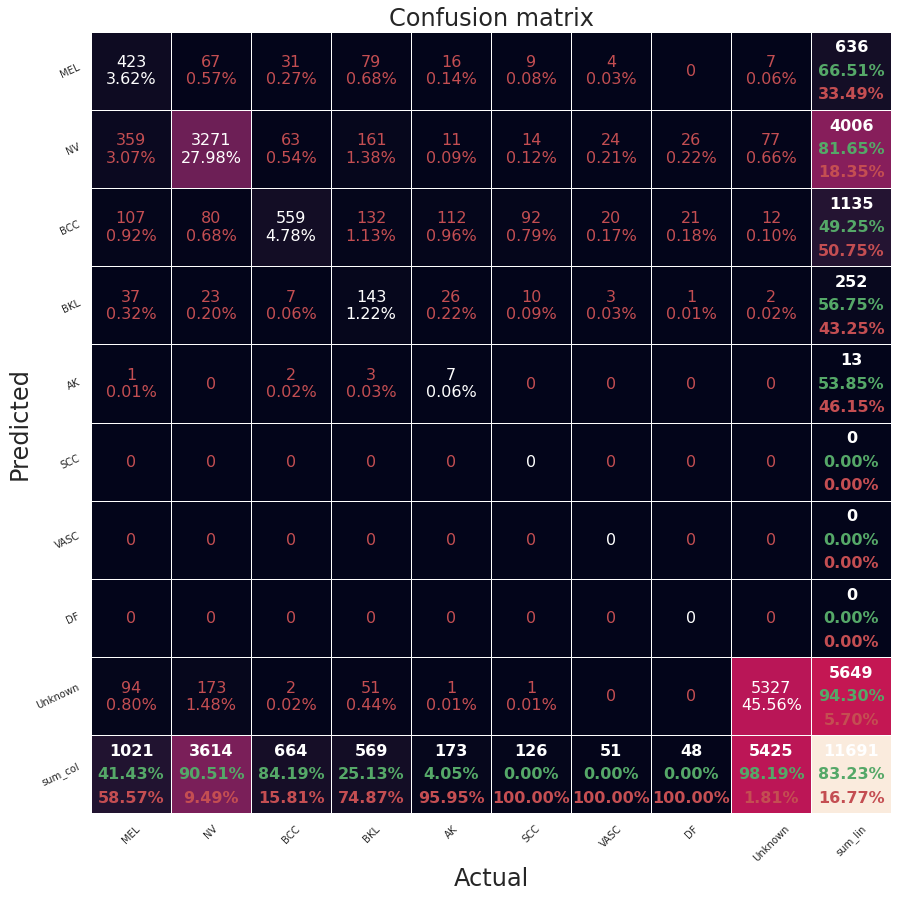

In [54]:
# colormap: see this and choose your more dear
cmap = None
sn.set(font_scale=2) # for label size'xtick.labelsize': 32, 'ytick.labelsize': 32
# sn.heatmap(df_cm, annot=True,annot_kws={"size": 10}) # font size
pp_matrix(df_cm, cmap=cmap,figsize=[13,13],fz=16,cbar=False,show_null_values=1)

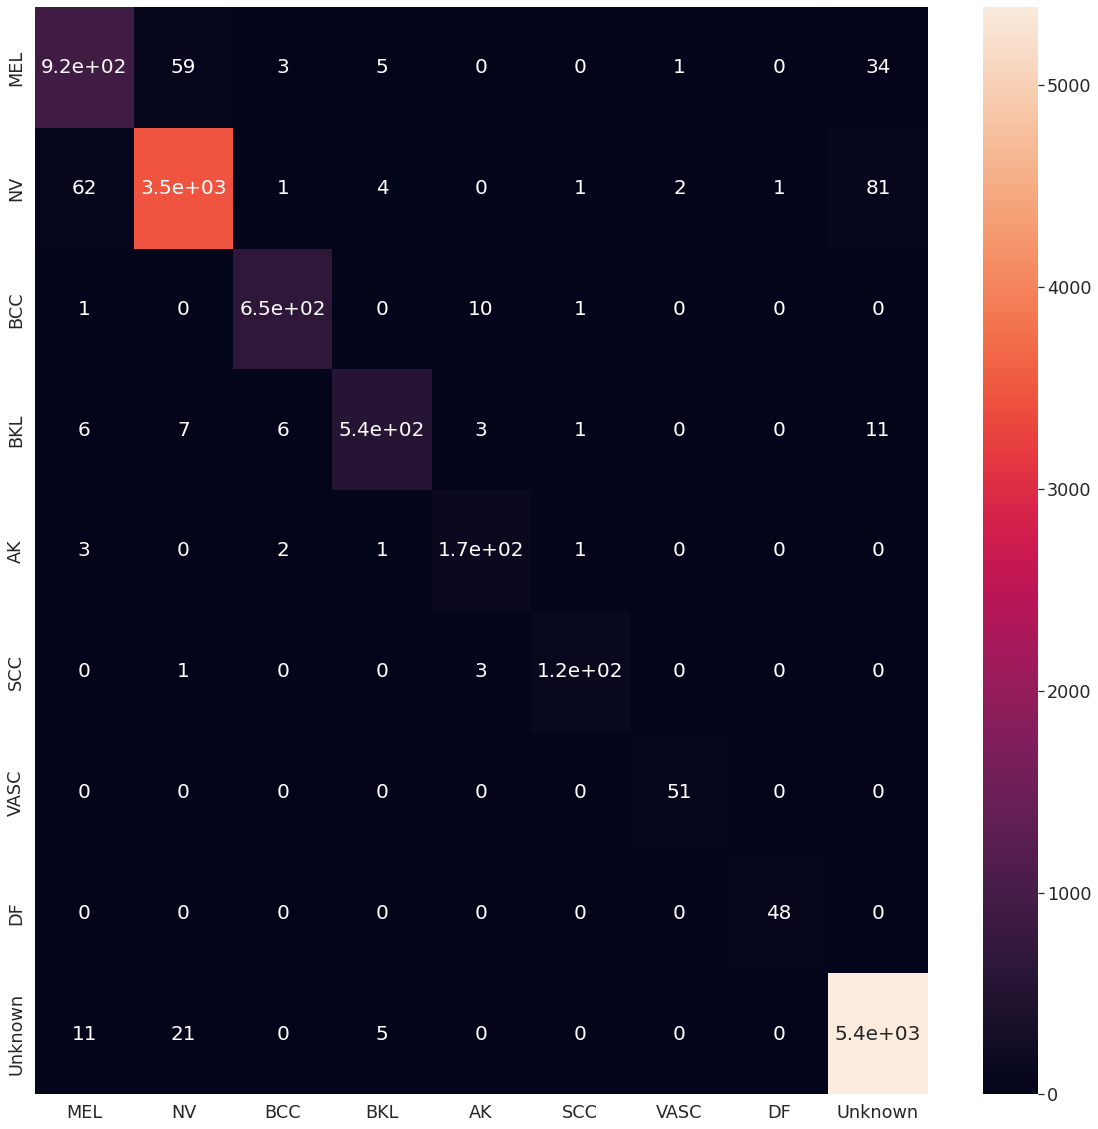

In [26]:
# sn.set(font_scale=1) # for label size
plt.figure(figsize=(20,20))
sn.set(font_scale=1.6) # for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 20}) # font size
plt.show()